## 4. Cách phá mã mà không cần khóa
1. Brute-force (thử mọi khóa)

- Ý tưởng: không gian khóa chỉ 26, nên thử tất cả 

k=0..25 và kiểm tra kết quả.

Độ phức tạp: 
𝑂
(
26
×
𝑛
)
O(26×n) với 
𝑛
n = độ dài văn bản → thực tế rất nhanh.

Thực hiện:

Với mỗi k từ 0 tới 25:

- Áp dụng giải mã 

D(c)=(c−k)mod26 cho toàn bộ ciphertext.

Kiểm tra kết quả: nếu xuất hiện nhiều từ tiếng Anh hợp lệ (ví dụ “THE”, “AND”, “IS”,...), chọn k đó.

Ví dụ:

Ciphertext KHOOR:

k=1 → JGNNQ

k=2 → IFMMP

k=3 → HELLO ← hợp lệ → dừng.

Ứng dụng thực tế: đơn giản, đáng dùng cho mọi ciphertext Caesar.

2. Phân tích tần suất (frequency analysis)

- Ý tưởng: Caesar là substitution đồng nhất (substitution bằng dịch); tần suất tương đối giữa các chữ cái không thay đổi, chỉ dịch vị trí. Vì vậy ký tự xuất hiện nhiều nhất trong ciphertext rất có khả năng là ký tự xuất hiện nhiều nhất trong ngôn ngữ (tiếng Anh thường là E).

Thực hiện:

Đếm tần suất xuất hiện của từng chữ cái trong ciphertext.

Lấy chữ cái có tần suất lớn nhất (ví dụ C_max).

- Ước lượng khóa: 
𝑘
^
=
(
𝐶
𝑚
𝑎
𝑥
−
′
𝐸
′
)
 
m
o
d
 
26
k
^
=(C
max
	​

−
′
E
′
)mod26.

Giải mã với 
𝑘
^
k
^
. Có thể thử các ký tự thường khác (T, A, O, I, N) nếu lần đầu không đúng.

Hạn chế: hiệu quả với văn bản dài; văn bản rất ngắn có thể sai.

3. Chi-squared scoring (tự động chọn kết quả đúng)

- Ý tưởng: cho mỗi dịch chuyển 

k giải mã được một candidate plaintext. So sánh phân bố chữ cái của candidate với phân bố tiêu chuẩn của tiếng Anh — chọn candidate có sai khác nhỏ nhất.

Công thức (chi-squared):

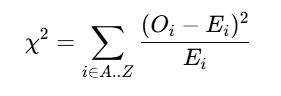

Oi
 = tần suất quan sát (số lần) của chữ cái 𝑖 trong candidate.

𝐸
𝑖
 = tần suất mong đợi = 
𝑝
𝑖
×
𝑁
p
i	​
(với 
𝑝
𝑖	​
là tỉ lệ tiêu chuẩn của chữ cái 𝑖 trong tiếng Anh, N = độ dài candidate).

Thực hiện:

Với mỗi 

k=0..25: giải mã → tính 
𝜒
2

Chọn 
𝑘
có 
𝜒
2

 nhỏ nhất → candidate gần tiếng Anh nhất.

Ưu điểm: tự động, hiệu quả với văn bản vừa/ dài; xử lý tốt hơn chỉ mapping vào 'E'.

4. Dùng cribs (known plaintext / từ biết trước)

- Nếu nghi ngờ ciphertext chứa một từ/phần chữ nhất định (ví dụ tên, “HTTP”, “PASSWORD”, “THE”), ta:

Tìm vị trí khả dĩ của crib trong ciphertext.

- Tính khóa 
𝑘
k từ một cặp ký tự (ví dụ nếu ciphertext tại vị trí i là C và crib ký tự tương ứng là T, thì 
𝑘
=
(
𝐶
−
𝑇
)
 
m
o
d
 
26
k=(C−T)mod26).

Kiểm tra nếu khóa đó giải mã toàn bộ văn bản ra hợp lý.

Rất nhanh khi có manh mối.

5. Kết hợp kiểm tra ngôn ngữ (language check)

- Sau brute-force hoặc scoring, xác nhận candidate bằng:

Đếm từ hợp lệ (so sánh với từ điển).

Tỉ lệ các n-gram hợp lệ (ví dụ bigrams/trigrams như “TH”, “HE”, “IN”).

Các regex kiểm tra: có “ the ”, “ and ”, dấu câu hợp lý, v.v.

Dùng để lọc kết quả tự động.

6. Pseudocode (tự động phá bằng brute-force + chi-squared)


In [ ]:
procedure break_caesar(ciphertext):
  best_score = +inf
  best_plain = ""
  best_k = -1
  for k in 0..25:
    candidate = caesar_decode(ciphertext, k)
    score = chi_squared_score(candidate, english_freq)   # càng nhỏ càng tốt
    if score < best_score:
      best_score = score
      best_plain = candidate
      best_k = k
  return best_k, best_plain


7. Ghi chú thực tế

Với văn bản tiếng Việt: thay đổi chữ cái phổ biến (tiếng Việt có dấu — cần chuẩn hóa loại bỏ dấu hoặc mở rộng bảng ký tự). Tuy nhiên Caesar thường dùng để minh họa, không dùng cho bảo mật thực tế.

Với văn bản ngắn (ví dụ 3–4 ký tự): brute-force vẫn là lựa chọn tốt nhất vì tần suất/chi-squared kém tin cậy.

Tự động hoá dễ: viết 1 hàm thử 26 khóa + scoring là giải pháp hoàn chỉnh cho hầu hết bài tập.

## 3. Không gian khóa

Không gian khóa – Caesar Cipher

Khóa chính là số k thể hiện mức dịch chuyển trong bảng chữ cái.

Vì bảng chữ cái Latin có 26 ký tự → không gian khóa gồm 26 giá trị khả dĩ:

𝑘
∈
{
0
,
1
,
2
,
…
,
25
}
k∈{0,1,2,…,25}

Nếu:

k=0 → bản mã = bản rõ (không có tác dụng).

k=13 → mã hóa và giải mã là giống nhau (còn gọi là ROT13, phổ biến trong mã hóa vui).

- Như vậy kích thước không gian khóa chỉ có 26 → rất nhỏ, dễ dàng brute-force.

## 2. Thuật toán mã hóa, giải mã
 
Thuật toán mã hoá – Caesar Cipher

Gọi bảng chữ cái gồm 26 ký tự: A, B, C, …, Z.

Biểu diễn mỗi ký tự bằng số nguyên: A = 0, B = 1, …, Z = 25.

Giả sử bản rõ là 
𝑝
p, khóa là 
𝑘
k (0 ≤ k ≤ 25).

Công thức mã hoá:

E(p)=(p+k)mod26

Bước làm:

- Đọc từng ký tự trong plaintext.

- Nếu là chữ cái: đổi sang số (0–25).

- Cộng với khóa 
k.

- Lấy mod 26.

- Đổi ngược số thành chữ.

- Giữ nguyên ký tự không phải chữ (dấu cách, dấu chấm, …).

Ví dụ:

Plaintext = HELLO

k = 3

Mã hoá:

H(7) → K(10)

E(4) → H(7)

L(11) → O(14)

L(11) → O(14)

O(14) → R(17)

→ Ciphertext = KHOOR

Giải mã KHOOR với k=3 sẽ ra lại HELLO.

## 1. Tên gọi
Phương pháp đầu tiên là Caesar Cipher (hay còn gọi là Mã Caesar, Caesar shift cipher hoặc Shift cipher).
Đây là dạng mã thay thế đơn giản (simple substitution cipher) do Julius Caesar sử dụng để mã hoá thông tin quân sự.
Ý tưởng: mỗi chữ cái trong bản rõ (plaintext) sẽ được dịch chuyển đi một số vị trí (k) trong bảng chữ cái.

Ví dụ với khóa k = 3:

A → D

B → E

C → F
…

X → A

Y → B

Z → C
